In [53]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
import nltk as nlp
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import time
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium

from sklearn.model_selection import train_test_split
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, accuracy_score
nltk.download('stopwords')
stop_words = stopwords.words('english')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mrdel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
df_review = pd.read_csv(r"C:\Users\mrdel\Desktop\BootCamp\NPLRepo Dataset\Hotel_Reviews.csv")

In [32]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 30 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Unnamed: 0                                  515738 non-null  int64  
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Average_Score                               515738 non-null  float64
 3   Negative_Review                             515738 non-null  object 
 4   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 5   Total_Number_of_Reviews                     515738 non-null  int64  
 6   Positive_Review                             515738 non-null  object 
 7   Review_Total_Positive_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews_Reviewer_Has_Given  515738 non-null  int64  
 9   Reviewer_Score                              515738 non-null  int64  
 

In [33]:
df_review.isna().sum()

Unnamed: 0                                    0
Additional_Number_of_Scoring                  0
Average_Score                                 0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Days_Since_Review                             0
Latitude                                      0
Longitude                                     0
Day                                           0
Month                                         0
Year                                          0
Reviewer_Nationality_Australia                0
Reviewer_Nationality_Ireland                  0
Reviewer_Nationality_UAE                      0
Reviewer_Nationality_UK                       0
Reviewer_Nationality_USA                

In [34]:
df_review.duplicated().any(axis=0)

False

In [35]:
df_review.describe()

,Unnamed: 0,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,...,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000
mean,257868.500000,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,0.570006,354.441932,49.432419,...,0.068711,0.365121,0.110936,0.116627,0.508594,0.072143,0.116199,0.075502,0.810059,2.362122
std,148880.880902,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,0.495075,208.928124,3.460237,...,0.252963,0.481465,0.314053,0.320976,0.499927,0.258725,0.320463,0.264199,0.392255,1.646808
min,0.000000,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,0.000000,0.000000,41.328376,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,128934.250000,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,0.000000,175.000000,48.214066,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,257868.500000,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,1.000000,353.000000,51.499981,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,386802.750000,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,1.000000,527.000000,51.516288,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,515737.000000,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,1.000000,730.000000,52.400181,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000


In [36]:
# drop unneeded column
df_review.drop('Unnamed: 0', axis=1, inplace=True)

In [37]:
df_review.head()

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,0,...,0,1,1,0,0,0,0,0,1,6
1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,0,...,0,0,1,0,0,0,0,0,1,4
2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,3,...,0,0,1,0,0,0,0,0,1,3
3,194,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,3,...,0,0,1,0,0,0,0,0,1,3
4,194,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,10,...,0,1,1,0,0,0,0,0,1,2


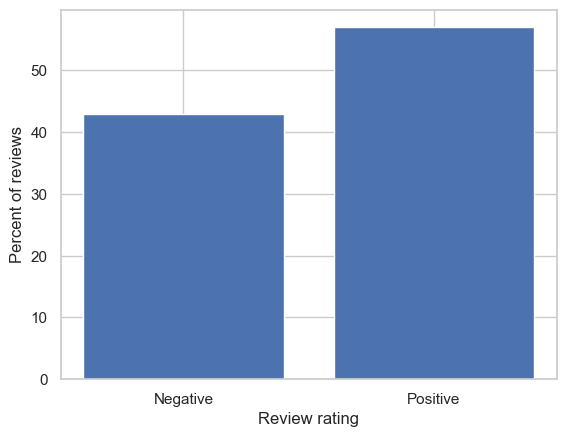

In [51]:
value_counts = dict(df_review['Reviewer_Score'].value_counts(normalize=True)*100)
plt.figure()
plt.bar(value_counts.keys(), value_counts.values())
plt.xlabel('Review rating')
plt.ylabel('Percent of reviews')
plt.xticks([0, 1],['Negative', 'Positive'])
plt.show()

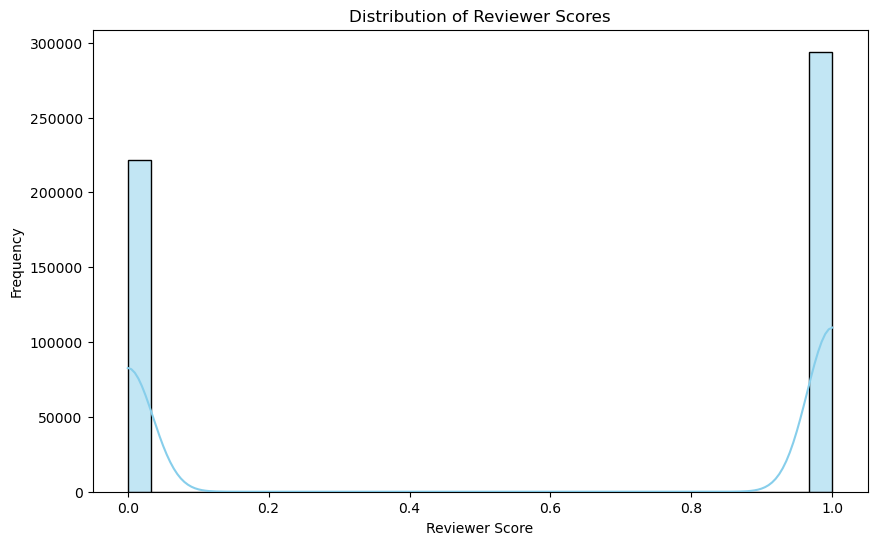

Reviewer_Score
1    293974
0    221764
Name: count, dtype: int64


In [38]:


# Plotting histogram of Reviewer_Score
plt.figure(figsize=(10, 6))
sns.histplot(df_review['Reviewer_Score'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Reviewer Scores')
plt.xlabel('Reviewer Score')
plt.ylabel('Frequency')
plt.show()
print(df_review['Reviewer_Score'].value_counts())

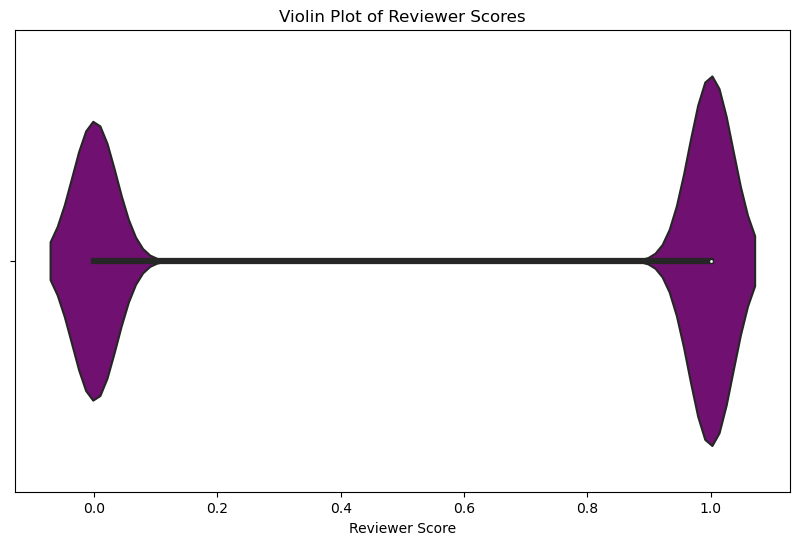

In [39]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df_review['Reviewer_Score'], color='purple')
plt.title('Violin Plot of Reviewer Scores')
plt.xlabel('Reviewer Score')
plt.show()


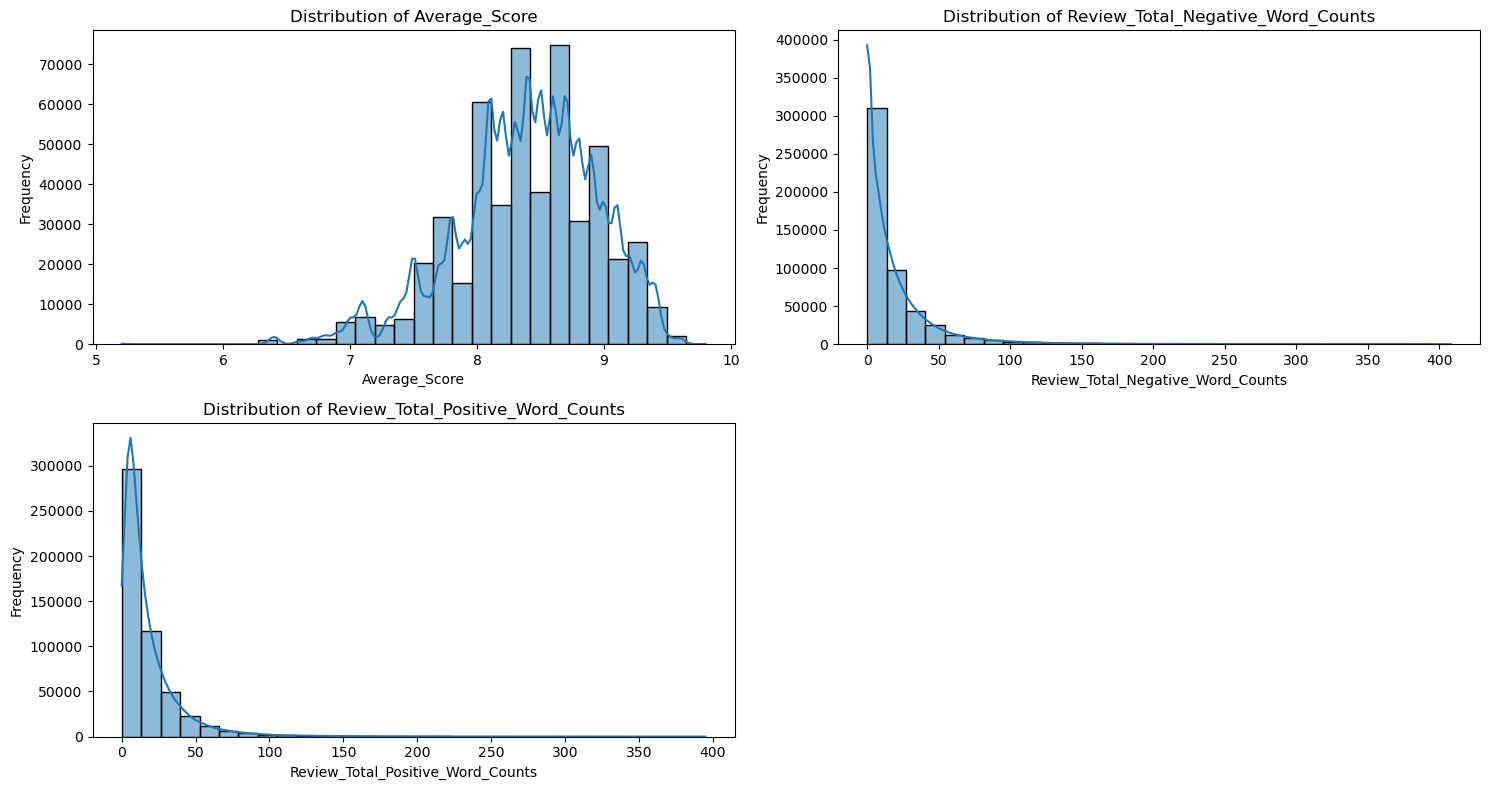

In [40]:
# Plotting histograms for numerical features
numerical_features = ['Average_Score', 'Review_Total_Negative_Word_Counts', 'Review_Total_Positive_Word_Counts']

plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_review[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


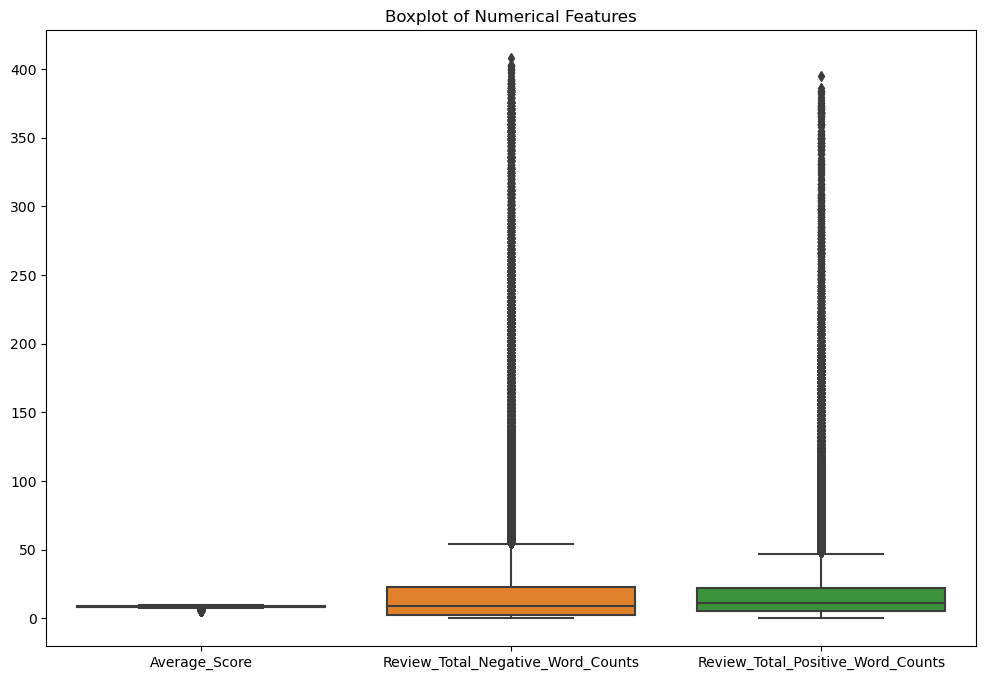

In [41]:
# Creating boxplots for numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_review[numerical_features])
plt.title('Boxplot of Numerical Features')
plt.show()


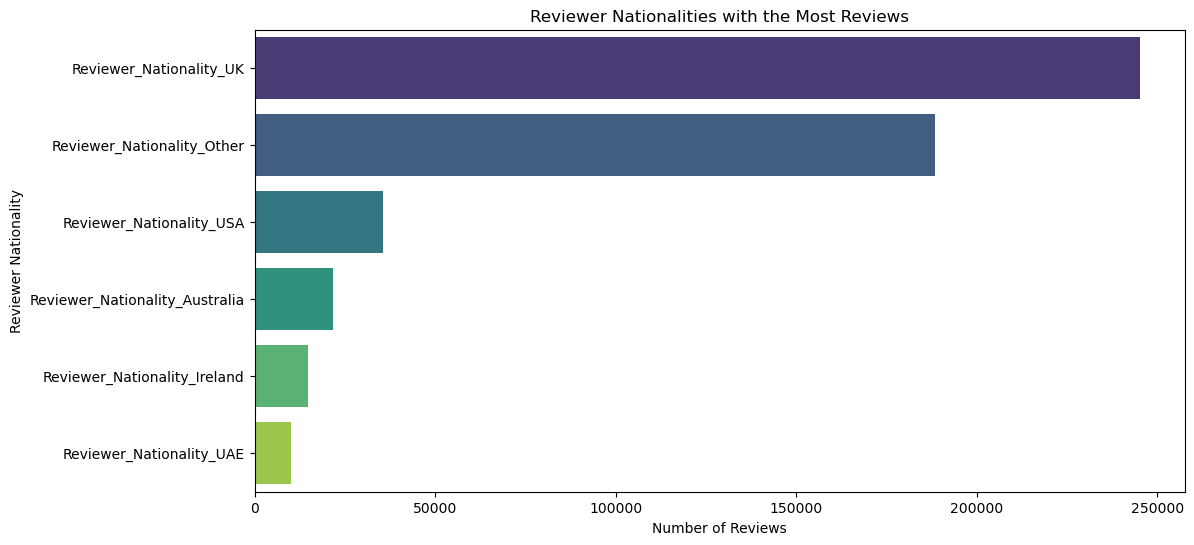

Reviewer Nationalities with the Most Reviews:
Reviewer_Nationality_UK           245246
Reviewer_Nationality_Other        188307
Reviewer_Nationality_USA           35437
Reviewer_Nationality_Australia     21686
Reviewer_Nationality_Ireland       14827
Reviewer_Nationality_UAE           10235
dtype: int64


In [42]:
# Selecting relevant columns
nationality_columns = [
    'Reviewer_Nationality_Australia',
    'Reviewer_Nationality_Ireland',
    'Reviewer_Nationality_UAE',
    'Reviewer_Nationality_UK',
    'Reviewer_Nationality_USA',
    'Reviewer_Nationality_Other'
]

# Summing up reviews for each nationality
total_reviews_by_nationality = df_review[nationality_columns].sum()

# Sorting and getting the top 10 nationalities
top_10_nationalities = total_reviews_by_nationality.sort_values(ascending=False)

# Plotting the top 10 reviewer nationalities
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_nationalities.values, y=top_10_nationalities.index, palette='viridis')
plt.title('Reviewer Nationalities with the Most Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Reviewer Nationality')
plt.show()

# Displaying the top nationalities and their review counts
print("Reviewer Nationalities with the Most Reviews:")
print(top_10_nationalities)



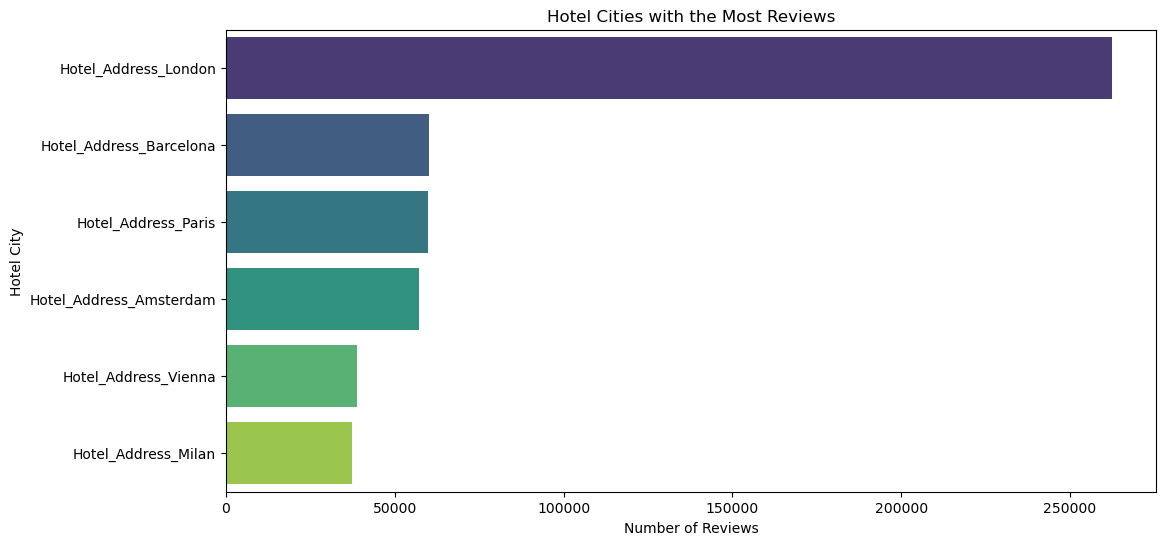

Hotel Cities with the Most Reviews:
Hotel_Address_London       262301
Hotel_Address_Barcelona     60149
Hotel_Address_Paris         59928
Hotel_Address_Amsterdam     57214
Hotel_Address_Vienna        38939
Hotel_Address_Milan         37207
dtype: int64


In [43]:
# Summing up reviews for each city
total_reviews_by_city = df_review[['Hotel_Address_Amsterdam', 'Hotel_Address_Barcelona',
                                    'Hotel_Address_London', 'Hotel_Address_Milan',
                                    'Hotel_Address_Paris', 'Hotel_Address_Vienna']].sum()

# Sorting and getting the top 10 cities
top_10_cities = total_reviews_by_city.sort_values(ascending=False).head(10)

# Plotting the top 10 hotel cities
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette='viridis')
plt.title('Hotel Cities with the Most Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Hotel City')
plt.show()

# Displaying the top cities and their review counts
print("Hotel Cities with the Most Reviews:")
print(top_10_cities)


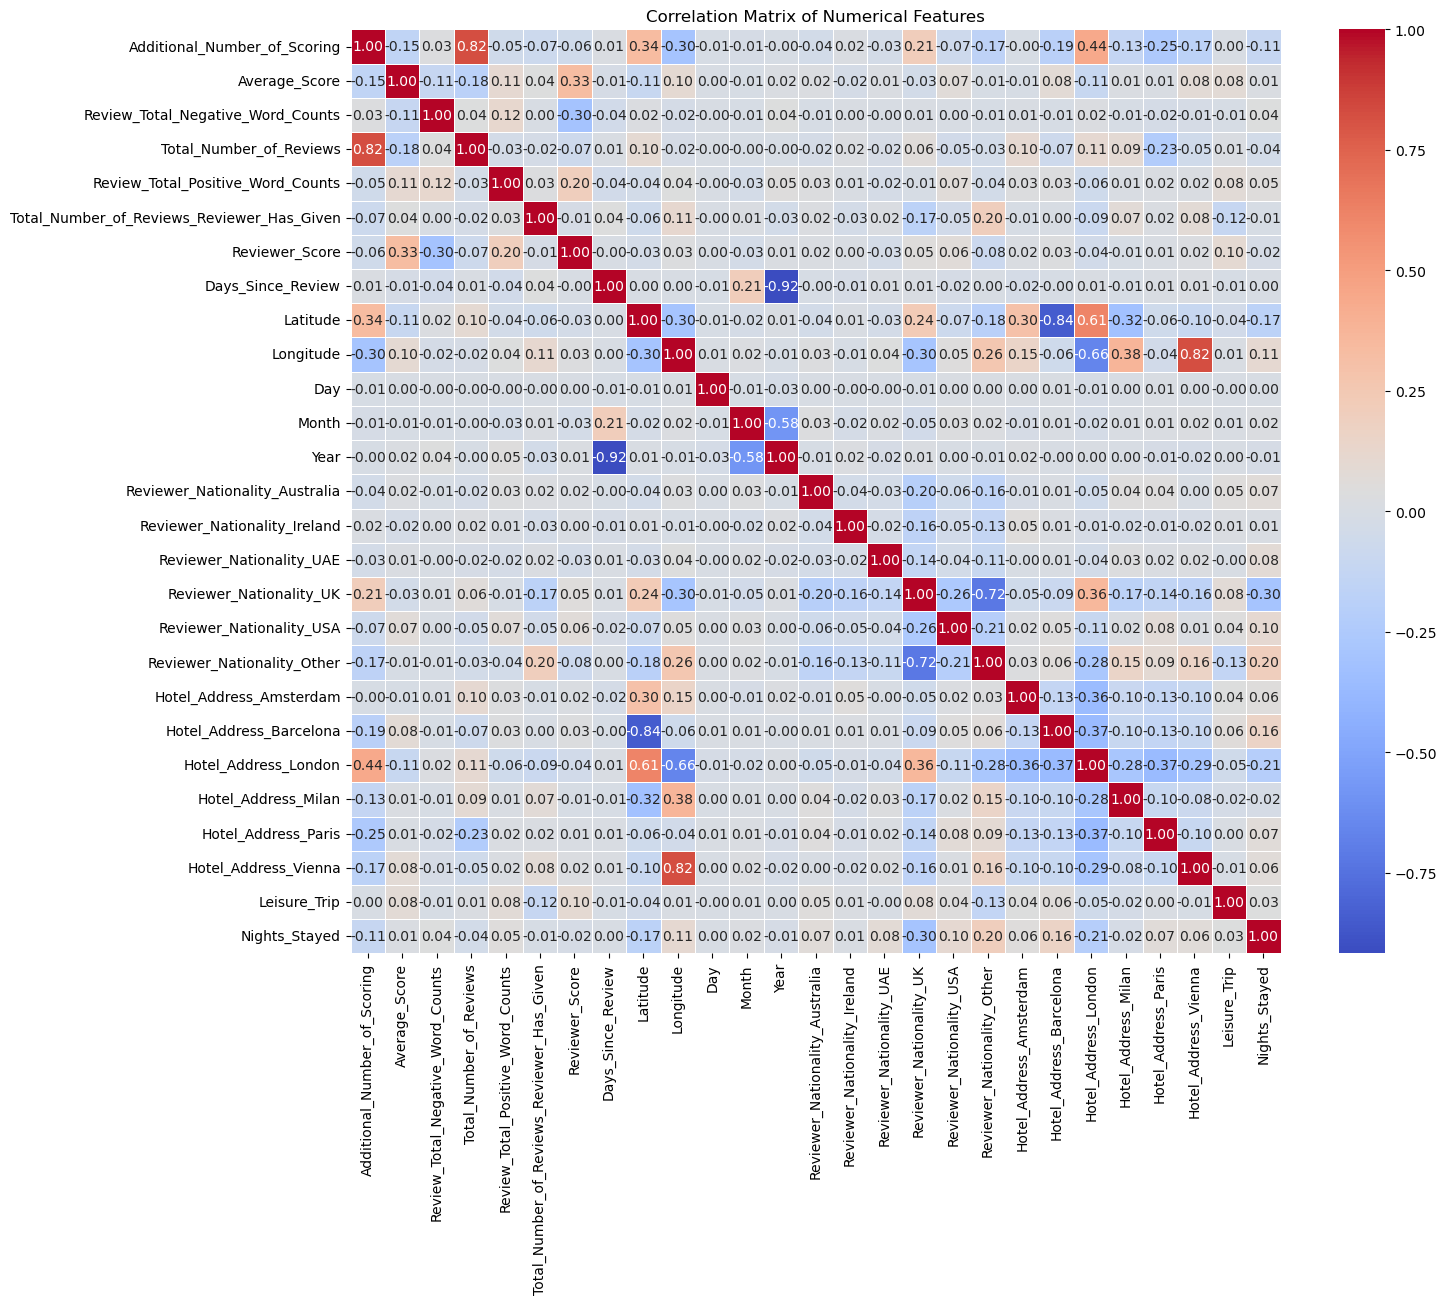

Correlation with Reviewer_Score:
 Reviewer_Score                                1.000000
Average_Score                                 0.330807
Review_Total_Positive_Word_Counts             0.199464
Leisure_Trip                                  0.101093
Reviewer_Nationality_USA                      0.064387
Reviewer_Nationality_UK                       0.049260
Hotel_Address_Barcelona                       0.031196
Longitude                                     0.027946
Hotel_Address_Vienna                          0.020806
Reviewer_Nationality_Australia                0.017384
Hotel_Address_Amsterdam                       0.015834
Year                                          0.013024
Hotel_Address_Paris                           0.009590
Reviewer_Nationality_Ireland                  0.004817
Day                                           0.002144
Days_Since_Review                            -0.002467
Hotel_Address_Milan                          -0.007739
Total_Number_of_Reviews_Reviewe

In [44]:
# Assuming df_review is your DataFrame
# Select numerical columns for correlation analysis
numerical_columns = df_review.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Focus on the correlation with the target variable (Reviewer_Score)
correlation_with_target = correlation_matrix['Reviewer_Score'].sort_values(ascending=False)

# Print the correlation with the target variable
print("Correlation with Reviewer_Score:\n", correlation_with_target)


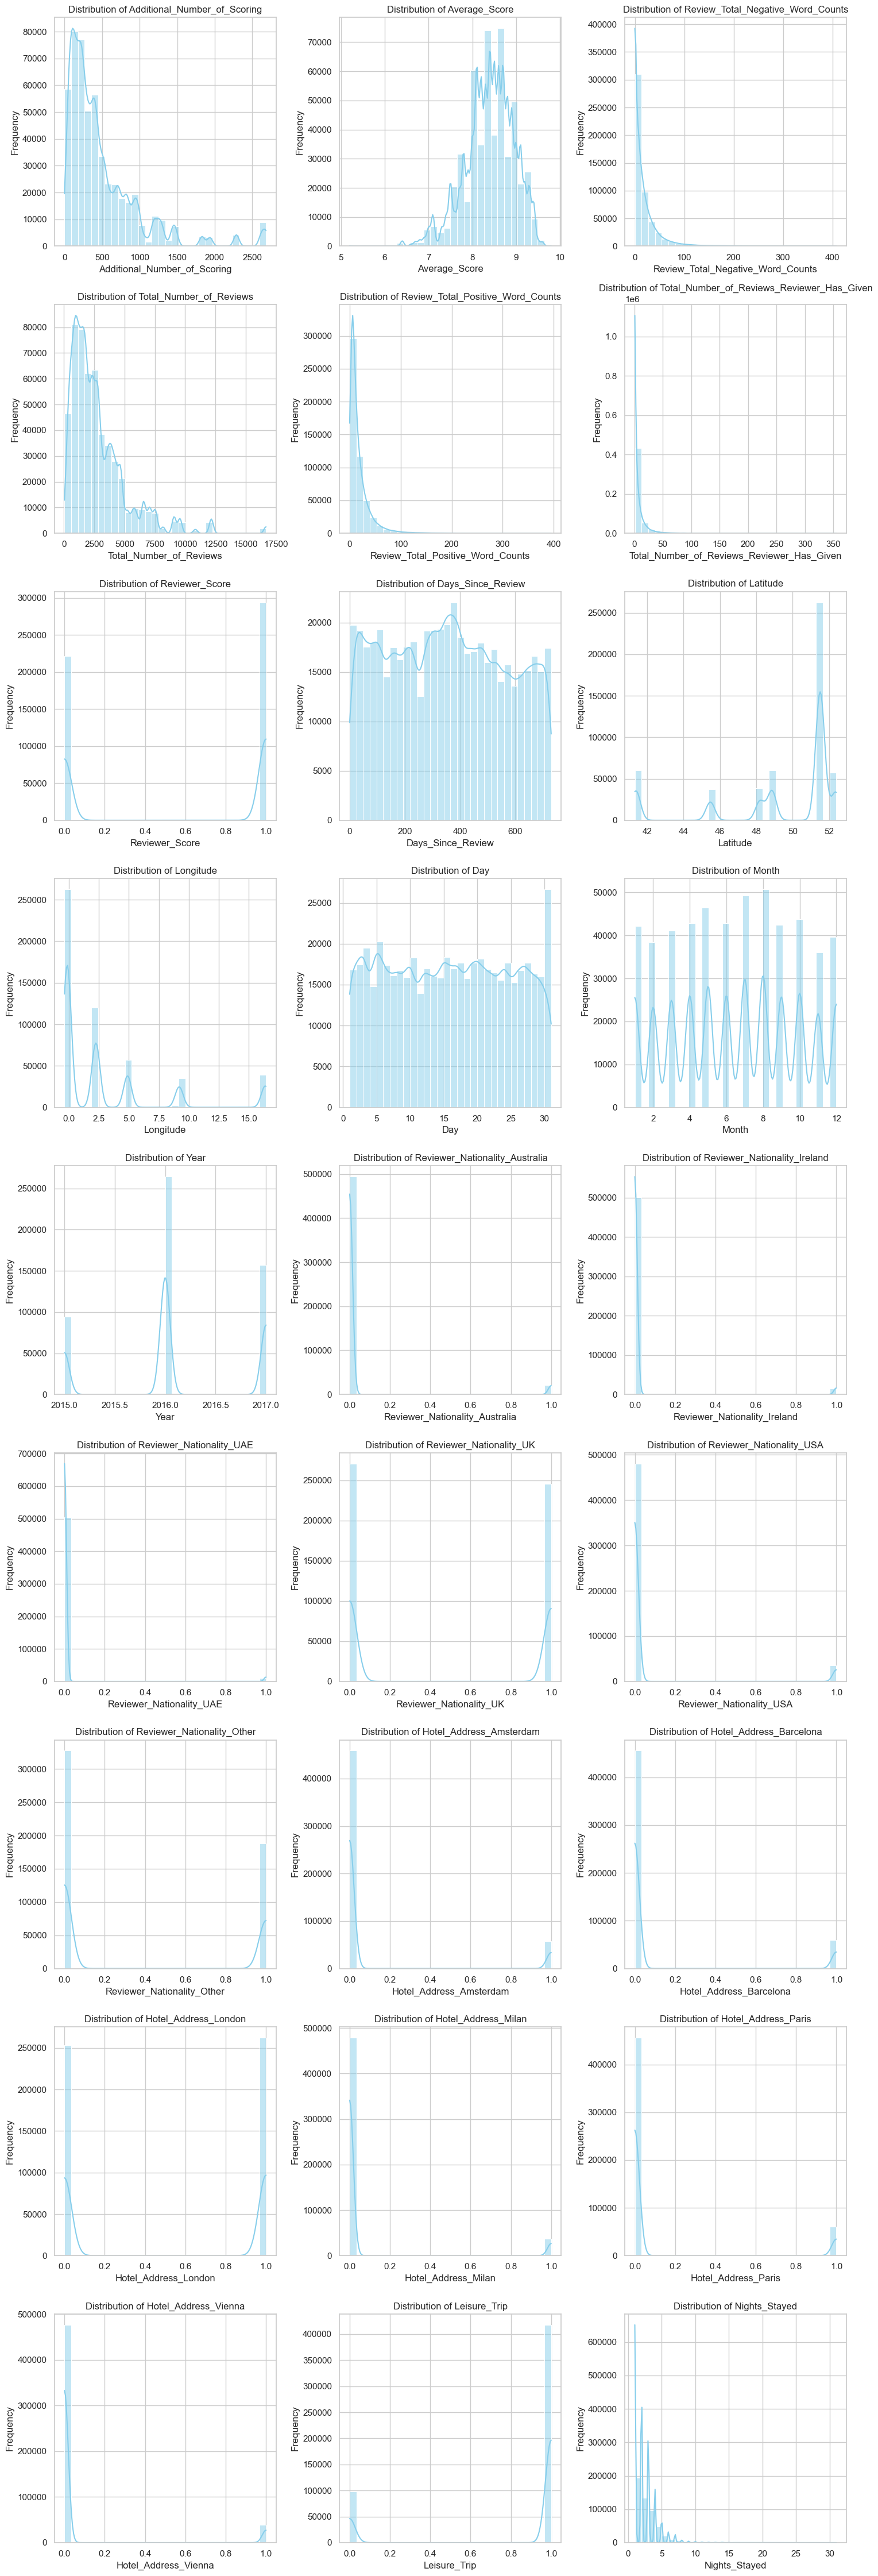

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_review is your DataFrame
numerical_columns = df_review.select_dtypes(include=['int64', 'float64'])

# Set the style for better visualization
sns.set(style="whitegrid")

# Plot histograms for numerical variables
num_rows = (len(numerical_columns.columns) + 2) // 3  # Adjust the number of rows based on the number of columns
plt.figure(figsize=(15, 5 * num_rows))

for i, column in enumerate(numerical_columns.columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(df_review[column], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()





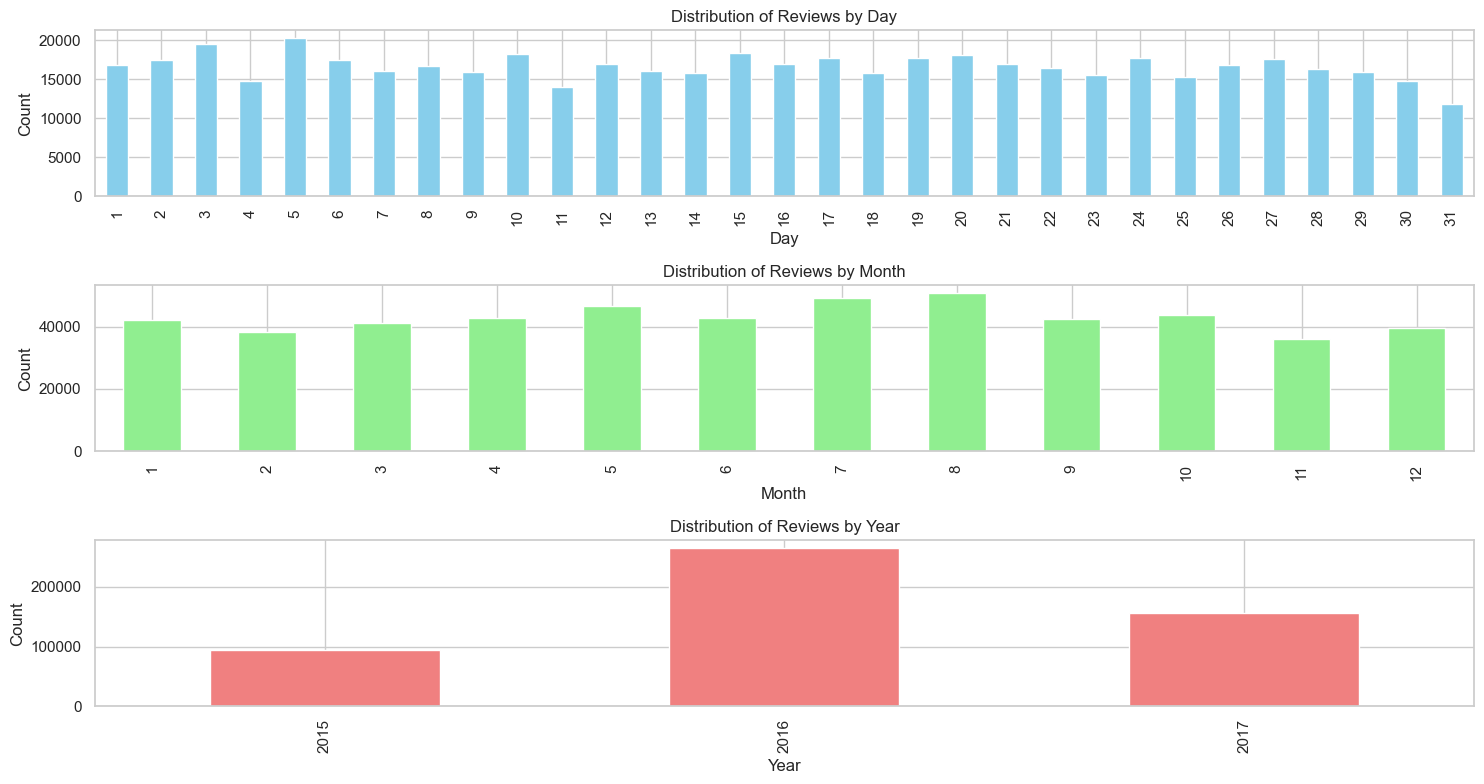

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
# Ensure that 'Day', 'Month', and 'Year' columns are in datetime format
df_review['Date'] = pd.to_datetime(df_review[['Year', 'Month', 'Day']])

# Plot the distribution of reviews over time
plt.figure(figsize=(15, 8))

# Distribution by Day
plt.subplot(3, 1, 1)
df_review['Date'].dt.day.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Reviews by Day')
plt.xlabel('Day')
plt.ylabel('Count')

# Distribution by Month
plt.subplot(3, 1, 2)
df_review['Date'].dt.month.value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Reviews by Month')
plt.xlabel('Month')
plt.ylabel('Count')

# Distribution by Year
plt.subplot(3, 1, 3)
df_review['Date'].dt.year.value_counts().sort_index().plot(kind='bar', color='lightcoral')
plt.title('Distribution of Reviews by Year')
plt.xlabel('Year')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


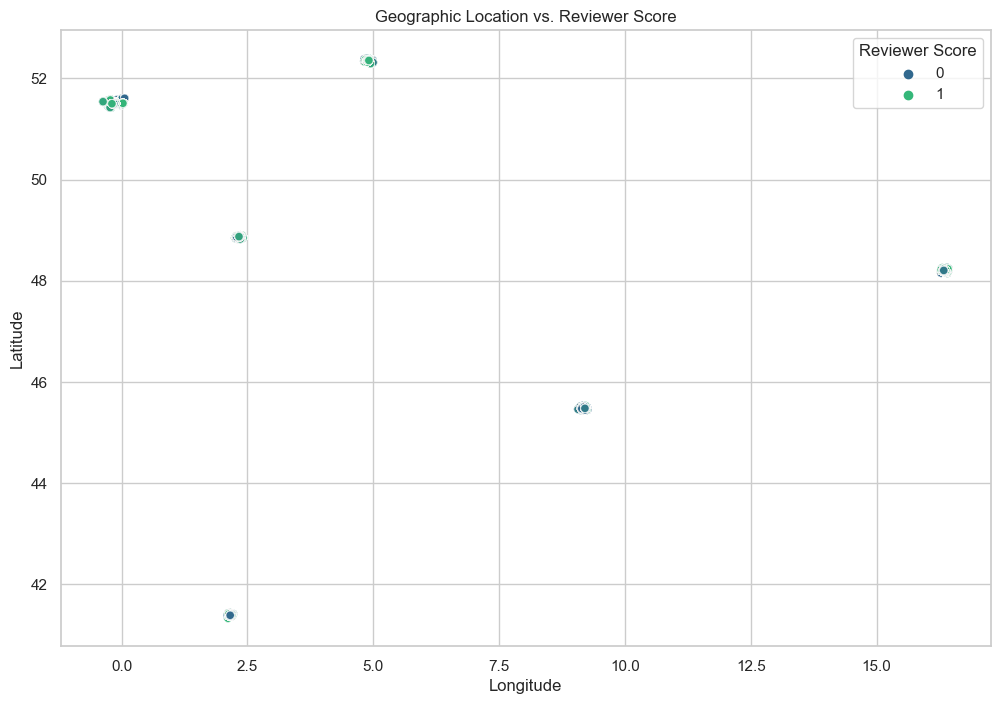

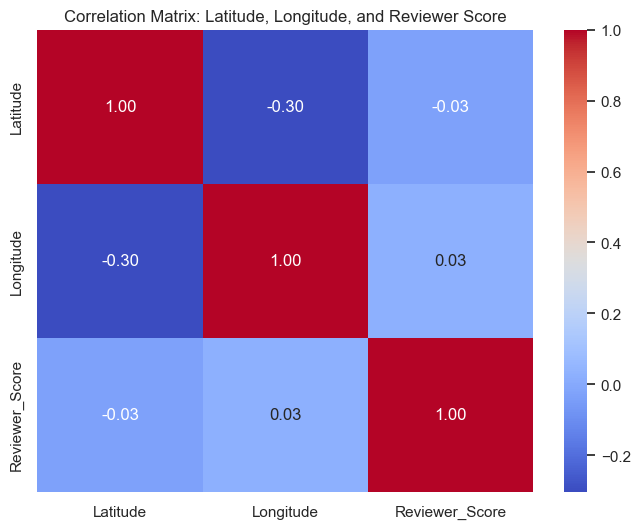

In [47]:


# Scatter plot to investigate correlation between Latitude, Longitude, and Reviewer_Score
plt.figure(figsize=(12, 8))

sns.scatterplot(x='Longitude', y='Latitude', hue='Reviewer_Score', palette='viridis', data=df_review, alpha=0.7, legend='auto')
plt.title('Geographic Location vs. Reviewer Score')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Reviewer Score')

plt.show()

# Correlation matrix to quantify correlation
correlation_matrix = df_review[['Latitude', 'Longitude', 'Reviewer_Score']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Latitude, Longitude, and Reviewer Score')
plt.show()


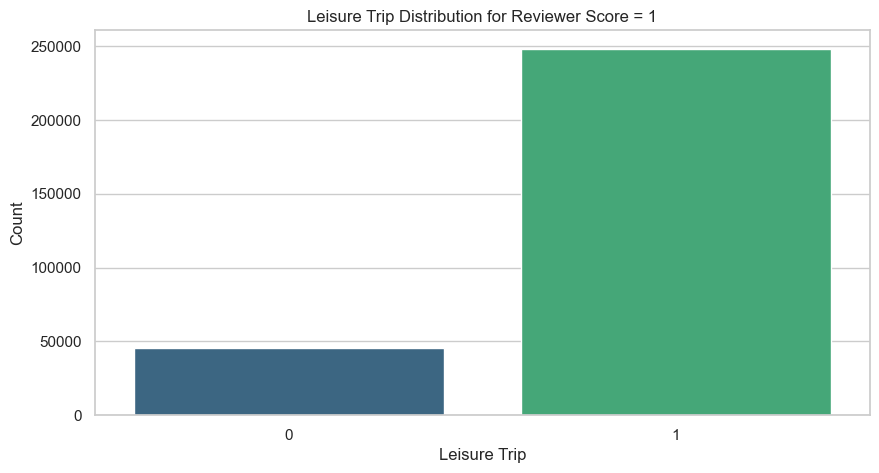

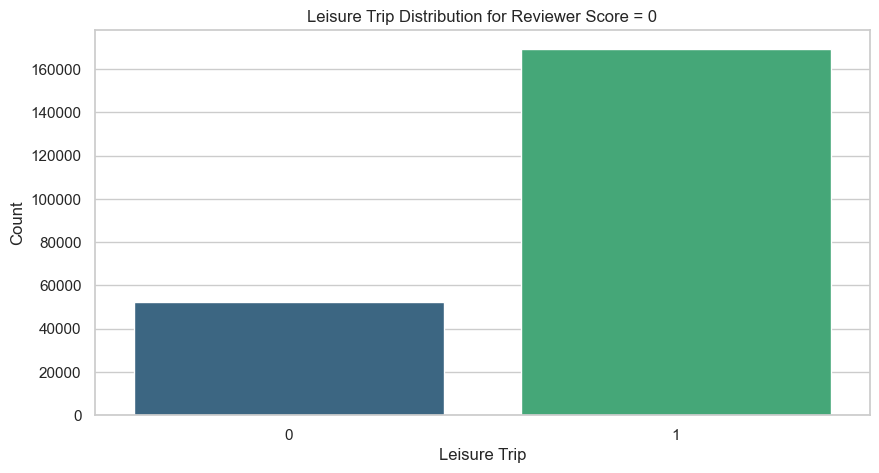

In [48]:
# Plot for Leisure_Trip distribution among Reviewer_Score = 1
plt.figure(figsize=(10, 5))
sns.countplot(x='Leisure_Trip', data=df_review[df_review['Reviewer_Score'] == 1], palette='viridis')
plt.title('Leisure Trip Distribution for Reviewer Score = 1')
plt.xlabel('Leisure Trip')
plt.ylabel('Count')
plt.show()

# Plot for Leisure_Trip distribution among Reviewer_Score = 0
plt.figure(figsize=(10, 5))
sns.countplot(x='Leisure_Trip', data=df_review[df_review['Reviewer_Score'] == 0], palette='viridis')
plt.title('Leisure Trip Distribution for Reviewer Score = 0')
plt.xlabel('Leisure Trip')
plt.ylabel('Count')
plt.show()


In [90]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Function for use in Vectorizer that tokenizes the document
def my_tokenizer(document, lemmatization=False, stemming=True, remove_numbers=True):
    '''
    Function for use in Vectorizer that tokenizes the document
    '''
    

    # remove punctuation
    for punct in string.punctuation:
        document = document.replace(punct, ' ')

    # tokenize - split on whitespace
    tokenized_document = document.split()

    # remove numbers
    if remove_numbers:
        tokenized_document = [word for word in tokenized_document if not any(char.isdigit() for char in word)]

    # remove words with only one letter
    tokenized_document = [word for word in tokenized_document if len(word) > 1]

    if stemming:
        ps = PorterStemmer()
        tokenized_document = [ps.stem(word) for word in tokenized_document]

    if lemmatization:
        lemmatizer = WordNetLemmatizer()
        tokenized_document = [lemmatizer.lemmatize(word) for word in tokenized_document]

    # remove stopwords after stemming or lemmatization
    stop_words = set(stopwords.words('english'))
    tokenized_document = [word for word in tokenized_document if word not in stop_words]

    

    return tokenized_document

# Assuming df_review is your DataFrame
X = df_review[['Positive_Review', 'Negative_Review']]
y = df_review['Reviewer_Score'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply CountVectorizer to Positive_Review column
vectorizer_pos = CountVectorizer(
    tokenizer=lambda x: my_tokenizer(x, remove_numbers=True),
    stop_words='english',
    lowercase=True,
    max_features=500,
    min_df=10,
    ngram_range=(1, 1),
    token_pattern=r"(?u)\b\w\w+\b"
)
X_train_pos = vectorizer_pos.fit_transform(X_train['Positive_Review'])
X_test_pos = vectorizer_pos.transform(X_test['Positive_Review'])

# Apply CountVectorizer to Negative_Review column
vectorizer_neg = CountVectorizer(
    tokenizer=lambda x: my_tokenizer(x, remove_numbers=True),
    stop_words='english',
    lowercase=True,
    max_features=500,
    min_df=10,
    ngram_range=(1, 1),
    token_pattern=r"(?u)\b\w\w+\b"
)
X_train_neg = vectorizer_neg.fit_transform(X_train['Negative_Review'])
X_test_neg = vectorizer_neg.transform(X_test['Negative_Review'])

# Output types and shapes
print('The output type is', type(X_train_pos))
print('The output type is', type(X_train_neg))
print('X_train_pos shape:', X_train_pos.shape)
print('X_test_pos shape:', X_test_pos.shape)
print('X_train_neg shape:', X_train_neg.shape)
print('X_test_neg shape:', X_test_neg.shape)


The output type is <class 'scipy.sparse._csr.csr_matrix'>
The output type is <class 'scipy.sparse._csr.csr_matrix'>
X_train_pos shape: (412590, 500)
X_test_pos shape: (103148, 500)
X_train_neg shape: (412590, 500)
X_test_neg shape: (103148, 500)


In [91]:
# Combine transformed features with original numeric features for train set
X_train_final = pd.concat([
    X_train.drop(['Positive_Review', 'Negative_Review'], axis=1),
    pd.DataFrame(X_train_pos.toarray(), columns=['pos_' + f for f in vectorizer_pos.get_feature_names_out()]),
    pd.DataFrame(X_train_neg.toarray(), columns=['neg_' + f for f in vectorizer_neg.get_feature_names_out()])
], axis=1)

# Combine transformed features with original numeric features for test set
X_test_final = pd.concat([
    X_test.drop(['Positive_Review', 'Negative_Review'], axis=1),
    pd.DataFrame(X_test_pos.toarray(), columns=['pos_' + f for f in vectorizer_pos.get_feature_names_out()]),
    pd.DataFrame(X_test_neg.toarray(), columns=['neg_' + f for f in vectorizer_neg.get_feature_names_out()])
], axis=1)

# Fill NaN values with zeros (if any)
X_train_final = X_train_final.fillna(0)
X_test_final = X_test_final.fillna(0)

# Now X_train_final and X_test_final contain the merged features ready for modeling


Shapes before any adjustments:
X_train_final shape: (412590, 1000)
y_train shape: (412590, 1)
X_test_final shape: (103148, 1000)
y_test shape: (103148, 1)

Shapes after alignment:
X_train_final shape: (412590, 1000)
y_train shape: (412590, 1)
X_test_final shape: (103148, 1000)
y_test shape: (103148, 1)
Train Accuracy: 0.5707
Test Accuracy: 0.5697


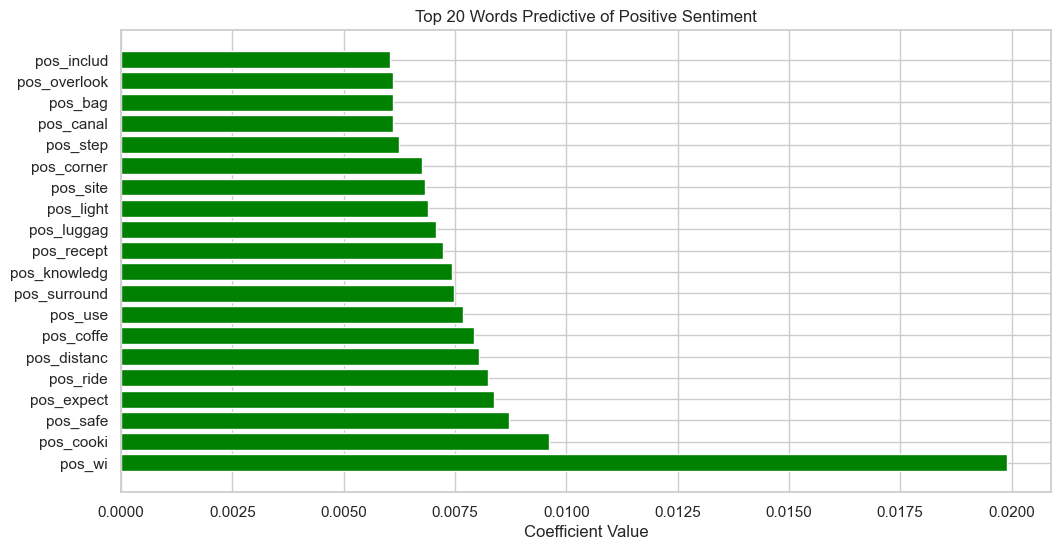

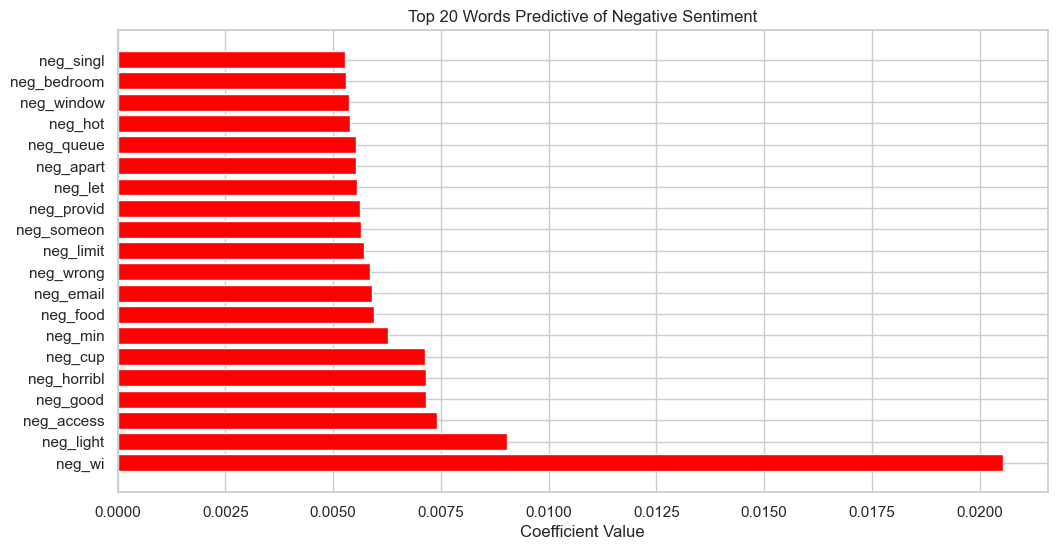

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Check the shapes of the data
print("Shapes before any adjustments:")
print("X_train_final shape:", X_train_final.shape)
print("y_train shape:", y_train.shape)
print("X_test_final shape:", X_test_final.shape)
print("y_test shape:", y_test.shape)

# Ensure the shapes match by aligning indices
X_train_final, y_train = X_train_final.align(pd.DataFrame(y_train), axis=0, join='inner')
X_test_final, y_test = X_test_final.align(pd.DataFrame(y_test), axis=0, join='inner')

# Check the shapes after alignment
print("\nShapes after alignment:")
print("X_train_final shape:", X_train_final.shape)
print("y_train shape:", y_train.shape)
print("X_test_final shape:", X_test_final.shape)
print("y_test shape:", y_test.shape)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)

# Fit Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train.values.ravel())

# Predictions on train and test sets
y_train_pred = logreg.predict(X_train_scaled)
y_test_pred = logreg.predict(X_test_scaled)

# Accuracy on train and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get coefficients and feature names
coefficients = logreg.coef_.flatten()
feature_names = X_train_final.columns

# Create a DataFrame with coefficients and feature names
coefficients_df = pd.DataFrame({'Coefficient': coefficients, 'Feature': feature_names})

# Get top 20 words for positive sentiment
# Assuming 'Word' is the column containing the words in your coefficients_df
top_positive_words = coefficients_df[coefficients_df['Feature'].str.startswith('pos_') & (coefficients_df['Coefficient'] > 0)].nlargest(20, 'Coefficient')

# Get top 20 words for negative sentiment
top_negative_words = coefficients_df[coefficients_df['Feature'].str.startswith('neg_') & (coefficients_df['Coefficient'] > 0)].nlargest(20, 'Coefficient')

# Bar chart for top 20 positive words
plt.figure(figsize=(12, 6))
plt.barh(top_positive_words['Feature'], top_positive_words['Coefficient'], color='green')
plt.xlabel('Coefficient Value')
plt.title('Top 20 Words Predictive of Positive Sentiment')
plt.show()

# Bar chart for top 20 negative words
plt.figure(figsize=(12, 6))
plt.barh(top_negative_words['Feature'], top_negative_words['Coefficient'], color='red')
plt.xlabel('Coefficient Value')
plt.title('Top 20 Words Predictive of Negative Sentiment')
plt.show()
